In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split , cross_val_score , KFold , GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier ,BaggingClassifier , VotingClassifier , AdaBoostClassifier , GradientBoostingClassifier , ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score

In [3]:
train_df = pd.read_csv('train_new_2v.csv')
train_df.tail()

,VisitNumber,TripType,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Return_bin,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
95669,191343,25,0,0,0,0,0,0,1,0.0,...,0,0,0,0,0,0,0,0,0,0
95670,191344,22,0,0,0,0,0,0,1,0.0,...,0,0,0,0,0,0,0,0,0,1
95671,191345,39,0,0,0,0,0,0,1,0.0,...,0,0,0,0,0,0,0,0,0,0
95672,191346,39,0,0,0,0,0,0,1,0.0,...,0,0,0,0,0,0,0,0,0,0
95673,191347,8,0,0,0,0,0,0,1,0.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df.index = train_df['VisitNumber']
train_df.drop(columns='VisitNumber',inplace=True)
train_df.tail()

,TripType,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Return_bin,1-HR PHOTO,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
191343,25,0,0,0,0,0,0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
191344,22,0,0,0,0,0,0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,1
191345,39,0,0,0,0,0,0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
191346,39,0,0,0,0,0,0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
191347,8,0,0,0,0,0,0,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_df.shape

(95674, 77)

In [6]:
train_X = train_df.iloc[:,1:]
train_y = train_df.iloc[:,0]

In [7]:
train_X.shape,train_y.shape

((95674, 76), (95674,))

## Modeling
### Which model we gonna apply on this DataFrame?
#### Model for Classification

#### Ensemble
- Aggregation Method:
        - Random Forest
        - VotingClassifier
        - BaggingClassifier
        - AdaBoostClassifer
        - GradientClassifier
        
- Boosting Method:
        - Perceptron
        - SGDClassifer
        - SVC

## Random Forest
- n_estimators
- max_depth

In [7]:
parameters = {'n_estimators':np.arange(1,100,10),'max_depth':np.arange(1,20,5)}

In [8]:
randomforest_model = RandomForestClassifier(random_state=0)

In [9]:
%%time
kfold = KFold(10)
grid_model = GridSearchCV(randomforest_model,parameters,scoring='accuracy',cv=kfold,n_jobs=-1)
grid_model.fit(train_X,train_y)

CPU times: user 1min 3s, sys: 848 ms, total: 1min 4s
Wall time: 12min 41s


In [ ]:
from sklearn.externals import joblib
filename = 'randomforest'
joblib.dump(grid_model,filename)

In [10]:
grid_model.cv_results_['params']

[{'max_depth': 1, 'n_estimators': 1},
 {'max_depth': 1, 'n_estimators': 11},
 {'max_depth': 1, 'n_estimators': 21},
 {'max_depth': 1, 'n_estimators': 31},
 {'max_depth': 1, 'n_estimators': 41},
 {'max_depth': 1, 'n_estimators': 51},
 {'max_depth': 1, 'n_estimators': 61},
 {'max_depth': 1, 'n_estimators': 71},
 {'max_depth': 1, 'n_estimators': 81},
 {'max_depth': 1, 'n_estimators': 91},
 {'max_depth': 6, 'n_estimators': 1},
 {'max_depth': 6, 'n_estimators': 11},
 {'max_depth': 6, 'n_estimators': 21},
 {'max_depth': 6, 'n_estimators': 31},
 {'max_depth': 6, 'n_estimators': 41},
 {'max_depth': 6, 'n_estimators': 51},
 {'max_depth': 6, 'n_estimators': 61},
 {'max_depth': 6, 'n_estimators': 71},
 {'max_depth': 6, 'n_estimators': 81},
 {'max_depth': 6, 'n_estimators': 91},
 {'max_depth': 11, 'n_estimators': 1},
 {'max_depth': 11, 'n_estimators': 11},
 {'max_depth': 11, 'n_estimators': 21},
 {'max_depth': 11, 'n_estimators': 31},
 {'max_depth': 11, 'n_estimators': 41},
 {'max_depth': 11, 'n_e

In [12]:
grid_model.cv_results_["mean_test_score"]

array([0.16293873, 0.22751218, 0.20113092, 0.19957355, 0.19342768,
       0.19730543, 0.1959153 , 0.19658423, 0.19513138, 0.19448335,
       0.24640968, 0.47720384, 0.48190731, 0.48034994, 0.48062169,
       0.47787278, 0.47489391, 0.47671259, 0.47490436, 0.47393231,
       0.37675858, 0.5154901 , 0.52338148, 0.52587955, 0.52837762,
       0.52712336, 0.52919288, 0.53013358, 0.52980956, 0.52992454,
       0.43339883, 0.55159186, 0.55836486, 0.56392541, 0.56343416,
       0.56418672, 0.5648243 , 0.56453164, 0.56677885, 0.56648619])

In [8]:
ls = [0.16293873, 0.22751218, 0.20113092, 0.19957355, 0.19342768,
       0.19730543, 0.1959153 , 0.19658423, 0.19513138, 0.19448335,
       0.24640968, 0.47720384, 0.48190731, 0.48034994, 0.48062169,
       0.47787278, 0.47489391, 0.47671259, 0.47490436, 0.47393231,
       0.37675858, 0.5154901 , 0.52338148, 0.52587955, 0.52837762,
       0.52712336, 0.52919288, 0.53013358, 0.52980956, 0.52992454,
       0.43339883, 0.55159186, 0.55836486, 0.56392541, 0.56343416,
       0.56418672, 0.5648243 , 0.56453164, 0.56677885, 0.56648619]

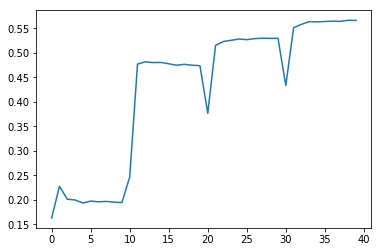

In [9]:
plt.plot(ls)

In [13]:
print(grid_model.best_score_)
print(grid_model.best_params_)

0.5667788531889542
{'max_depth': 16, 'n_estimators': 81}


## Extreme Random Forest

In [14]:
parameters = {'n_estimators':np.arange(1,100,10),'max_depth':np.arange(1,20,5)}

In [15]:
extratree_model = ExtraTreesClassifier(random_state=0)

In [16]:
%%time
kfold = KFold(10)
grid_model2 = GridSearchCV(extratree_model,parameters,scoring='accuracy',cv=kfold,n_jobs=-1)
grid_model2.fit(train_X,train_y)

CPU times: user 56.1 s, sys: 832 ms, total: 56.9 s
Wall time: 10min 29s


In [ ]:
from sklearn.externals import joblib
filename = 'extremeforest'
joblib.dump(grid_model2,filename)

In [17]:
grid_model2.cv_results_['params']

[{'max_depth': 1, 'n_estimators': 1},
 {'max_depth': 1, 'n_estimators': 11},
 {'max_depth': 1, 'n_estimators': 21},
 {'max_depth': 1, 'n_estimators': 31},
 {'max_depth': 1, 'n_estimators': 41},
 {'max_depth': 1, 'n_estimators': 51},
 {'max_depth': 1, 'n_estimators': 61},
 {'max_depth': 1, 'n_estimators': 71},
 {'max_depth': 1, 'n_estimators': 81},
 {'max_depth': 1, 'n_estimators': 91},
 {'max_depth': 6, 'n_estimators': 1},
 {'max_depth': 6, 'n_estimators': 11},
 {'max_depth': 6, 'n_estimators': 21},
 {'max_depth': 6, 'n_estimators': 31},
 {'max_depth': 6, 'n_estimators': 41},
 {'max_depth': 6, 'n_estimators': 51},
 {'max_depth': 6, 'n_estimators': 61},
 {'max_depth': 6, 'n_estimators': 71},
 {'max_depth': 6, 'n_estimators': 81},
 {'max_depth': 6, 'n_estimators': 91},
 {'max_depth': 11, 'n_estimators': 1},
 {'max_depth': 11, 'n_estimators': 11},
 {'max_depth': 11, 'n_estimators': 21},
 {'max_depth': 11, 'n_estimators': 31},
 {'max_depth': 11, 'n_estimators': 41},
 {'max_depth': 11, 'n_e

In [18]:
grid_model2.cv_results_["mean_test_score"]

array([0.13411167, 0.14106236, 0.12953362, 0.13580492, 0.13957815,
       0.13933775, 0.14060246, 0.13935866, 0.14071744, 0.14316324,
       0.15609256, 0.27824696, 0.27063779, 0.26476368, 0.25637059,
       0.24619019, 0.24866735, 0.24604386, 0.25166712, 0.24977528,
       0.18819115, 0.34754479, 0.32794699, 0.3328595 , 0.32407969,
       0.3144846 , 0.3144846 , 0.31055459, 0.31705584, 0.31944938,
       0.21009888, 0.42223593, 0.39968016, 0.40410143, 0.39462132,
       0.39080628, 0.39001192, 0.38808872, 0.39208144, 0.38939524])

In [10]:
ls2 = [0.13411167, 0.14106236, 0.12953362, 0.13580492, 0.13957815,
       0.13933775, 0.14060246, 0.13935866, 0.14071744, 0.14316324,
       0.15609256, 0.27824696, 0.27063779, 0.26476368, 0.25637059,
       0.24619019, 0.24866735, 0.24604386, 0.25166712, 0.24977528,
       0.18819115, 0.34754479, 0.32794699, 0.3328595 , 0.32407969,
       0.3144846 , 0.3144846 , 0.31055459, 0.31705584, 0.31944938,
       0.21009888, 0.42223593, 0.39968016, 0.40410143, 0.39462132,
       0.39080628, 0.39001192, 0.38808872, 0.39208144, 0.38939524]

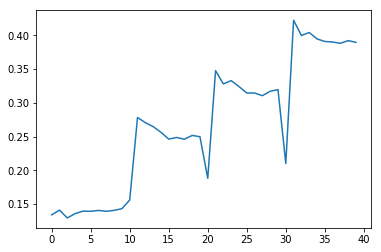

In [11]:
plt.plot(ls2)

In [19]:
print(grid_model2.best_score_)
print(grid_model2.best_params_)

0.4222359261659385
{'max_depth': 16, 'n_estimators': 11}


## VotingClassifier

In [7]:
model1 = LogisticRegression(random_state=1)
model2 = QuadraticDiscriminantAnalysis()
model3 = LinearDiscriminantAnalysis()
model4 = GaussianNB()

In [8]:
ensemble1 = VotingClassifier(estimators=[('lr', model1), ('qda', model2), ('lda', model3) , ('gnb',model4)], 
                            voting='hard').fit(train_X,train_y)

In [9]:
ensemble2 = VotingClassifier(estimators=[('lr', model1), ('lda', model3) , ('gnb',model4)], 
                            voting='hard').fit(train_X,train_y)

In [10]:
ensemble3 = VotingClassifier(estimators=[('lr', model1), ('lda', model3)], 
                            voting='hard').fit(train_X,train_y)

In [11]:
ensemble4 = VotingClassifier(estimators=[('lr', model1), ('qda', model2), ('lda', model3) , ('gnb',model4)], 
                            voting='soft',weights = [4,1,3,2]).fit(train_X,train_y)

In [12]:
ensemble5 = VotingClassifier(estimators=[('lr', model1), ('lda', model3) ], 
                            voting='soft',weights = [6,4]).fit(train_X,train_y)

In [13]:
%%time
ac_en1 = accuracy_score(train_y,ensemble1.predict(train_X))
ac_en2 = accuracy_score(train_y,ensemble2.predict(train_X))
ac_en3 = accuracy_score(train_y,ensemble3.predict(train_X))
ac_en4 = accuracy_score(train_y,ensemble4.predict(train_X))
ac_en5 = accuracy_score(train_y,ensemble5.predict(train_X))

/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

CPU times: user 48.7 s, sys: 8.8 s, total: 57.5 s
Wall time: 15.1 s


/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [13]:
%%time
print("ensemble 1's accuracy_score :",accuracy_score(train_y,ensemble1.predict(train_X))),
print("ensemble 2's accuracy_score :",accuracy_score(train_y,ensemble2.predict(train_X))),
print("ensemble 3's accuracy_score :",accuracy_score(train_y,ensemble3.predict(train_X))),
print("ensemble 4's accuracy_score :",accuracy_score(train_y,ensemble4.predict(train_X))),
print("ensemble 5's accuracy_score :",accuracy_score(train_y,ensemble5.predict(train_X)))

/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


ensemble 1's accuracy_score : 0.33768840019231977


/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


ensemble 2's accuracy_score : 0.5195037314212848


/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


ensemble 3's accuracy_score : 0.5357045801367143


/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


ensemble 4's accuracy_score : 0.499226540125844
ensemble 5's accuracy_score : 0.6188410644480214
CPU times: user 1min 2s, sys: 11.2 s, total: 1min 13s
Wall time: 19.4 s


/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#### Voting_classifier which use 'logistic regression' and 'linear discriminant analysis' has the best performance among the model which I used

In [ ]:
%%time
kfold = KFold(10)
vot_1 = cross_val_score(ensemble1,train_X,train_y,cv=kfold,n_jobs=-1) 
vot_2 = cross_val_score(ensemble2,train_X,train_y,cv=kfold,n_jobs=-1)
vot_3 = cross_val_score(ensemble3,train_X,train_y,cv=kfold,n_jobs=-1)
vot_4 = cross_val_score(ensemble4,train_X,train_y,cv=kfold,n_jobs=-1)
vot_5 = cross_val_score(ensemble5,train_X,train_y,cv=kfold,n_jobs=-1)

/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

## BaggingClassifier

In [ ]:
bag_model1 = BaggingClassifier(LogisticRegression(), bootstrap_features=True, random_state=0).fit(train_X,train_y)
bag_model2 = BaggingClassifier(LinearDiscriminantAnalysis(), bootstrap_features=True, random_state=0).fit(train_X,train_y)
bag_model3 = BaggingClassifier(DecisionTreeClassifier(max_depth=15), bootstrap_features=True, random_state=0).fit(train_X,train_y)
bag_model4 = BaggingClassifier(DecisionTreeClassifier(max_depth=10), bootstrap_features=True, random_state=0).fit(train_X,train_y)
bag_model5 = BaggingClassifier(DecisionTreeClassifier(max_depth=5), bootstrap_features=True, random_state=0).fit(train_X,train_y)

In [ ]:
print("bag_model 1's accuracy_score :",accuracy_score(train_y,bag_model1.predict(train_X))),
print("bag_model 2's accuracy_score :",accuracy_score(train_y,bag_model2.predict(train_X))),
print("bag_model 3's accuracy_score :",accuracy_score(train_y,bag_model3.predict(train_X))),
print("bag_model 4's accuracy_score :",accuracy_score(train_y,bag_model4.predict(train_X))),
print("bag_model 5's accuracy_score :",accuracy_score(train_y,bag_model5.predict(train_X))),

In [ ]:
%%time
kfold = KFold(10)
bag_1 = cross_val_score(bag_model1,train_X,train_y,cv=kfold,n_jobs=-1)
bag_2 = cross_val_score(bag_model2,train_X,train_y,cv=kfold,n_jobs=-1)
bag_3 = cross_val_score(bag_model3,train_X,train_y,cv=kfold,n_jobs=-1)
bag_4 = cross_val_score(bag_model4,train_X,train_y,cv=kfold,n_jobs=-1)
bag_5 = cross_val_score(bag_model5,train_X,train_y,cv=kfold,n_jobs=-1)

## Adaboost

In [42]:
parameters = {'n_estimators':np.arange(1,100,10)}

In [43]:
ada_model = AdaBoostClassifier(random_state=0)

In [44]:
%%time
kfold = KFold(10)
grid_model3 = GridSearchCV(ada_model,parameters,scoring='accuracy',cv=kfold,n_jobs=-1)
grid_model3.fit(train_X,train_y)

CPU times: user 24.9 s, sys: 951 ms, total: 25.8 s
Wall time: 8min 55s


In [ ]:
from sklearn.externals import joblib
filename = 'adaboost'
joblib.dump(grid_model3,filename)

In [45]:
grid_model3.cv_results_['params']

[{'n_estimators': 1},
 {'n_estimators': 11},
 {'n_estimators': 21},
 {'n_estimators': 31},
 {'n_estimators': 41},
 {'n_estimators': 51},
 {'n_estimators': 61},
 {'n_estimators': 71},
 {'n_estimators': 81},
 {'n_estimators': 91}]

In [46]:
grid_model3.cv_results_["mean_test_score"]

array([0.19143132, 0.20408889, 0.20416205, 0.20416205, 0.20416205,
       0.20416205, 0.20416205, 0.20416205, 0.20416205, 0.20416205])

In [47]:
print(grid_model3.best_score_)
print(grid_model3.best_params_)

0.20416205029579615
{'n_estimators': 21}


## Support Vector Machine

In [60]:
svc_model = SVC(random_state=0)

In [61]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [
    {'clf__C': param_range, 'clf__kernel': ['linear']},
    {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]

In [18]:
%%time
grid_model5 = GridSearchCV(estimator=svc_model,param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)
grid_model5 = grid_model5.fit(train_X, train_y)

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/home/hskimim/anaconda3/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x7f082fc81a50, file "/...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/home/hskimim/anaconda3/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/home/hskimim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/home/hskimi.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x7f082fc81a50, file "/...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/home/hskimim/anaconda3/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/home/hskimim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/home/hskimi.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    122         except (RuntimeError, AssertionError):
    123             old_loop = None
    124         try:
    125             self._setup_logging()
    126             asyncio.set_event_loop(self.asyncio_loop)
--> 127             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Uni...EventLoop running=True closed=False debug=False>>
    128         finally:
    129             asyncio.set_event_loop(old_loop)
    130 
    131     def stop(self):

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/asyncio/base_events.py in run_forever(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
    417             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    418                                    finalizer=self._asyncgen_finalizer_hook)
    419         try:
    420             events._set_running_loop(self)
    421             while True:
--> 422                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_UnixS...EventLoop running=True closed=False debug=False>>
    423                 if self._stopping:
    424                     break
    425         finally:
    426             self._stopping = False

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/asyncio/base_events.py in _run_once(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
   1427                         logger.warning('Executing %s took %.3f seconds',
   1428                                        _format_handle(handle), dt)
   1429                 finally:
   1430                     self._current_handle = None
   1431             else:
-> 1432                 handle._run()
        handle._run = <bound method Handle._run of <Handle IOLoop._run_callback(functools.par...7f07e85f3048>))>>
   1433         handle = None  # Needed to break cycles when an exception occurs.
   1434 
   1435     def _set_coroutine_wrapper(self, enabled):
   1436         try:

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/asyncio/events.py in _run(self=<Handle IOLoop._run_callback(functools.par...7f07e85f3048>))>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method IOLoop._run_callback of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (functools.partial(<function wrap.<locals>.null_wrapper at 0x7f07e85f3048>),)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py in _run_callback(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, callback=functools.partial(<function wrap.<locals>.null_wrapper at 0x7f07e85f3048>))
    754         """Runs a callback with error handling.
    755 
    756         For use in subclasses.
    757         """
    758         try:
--> 759             ret = callback()
        ret = undefined
        callback = functools.partial(<function wrap.<locals>.null_wrapper at 0x7f07e85f3048>)
    760             if ret is not None:
    761                 from tornado import gen
    762                 # Functions that return Futures typically swallow all
    763                 # exceptions and store them in the Future.  If a Future

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ()
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in <lambda>()
    531             return
    532 
    533         if state & self.socket.events:
    534             # events still exist that haven't been processed
    535             # explicitly schedule handling to avoid missing events due to edge-triggered FDs
--> 536             self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
    537 
    538     def _init_io_state(self):
    539         """initialize the ioloop event handler"""
    540         with stack_context.NullContext():

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=0)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': '%%time\ngrid_model5 = GridSearchCV(estimator=svc_...)\ngrid_model5 = grid_model5.fit(train_X, train_y)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 7, 29, 17, 5, 51, 768671, tzinfo=tzutc()), 'msg_id': 'c70dba6b6a77ce518ba0fbf236e36e45', 'msg_type': 'execute_request', 'session': 'e2e6dac0975cb2362259e935303fd82d', 'username': '', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'c70dba6b6a77ce518ba0fbf236e36e45', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'e2e6dac0975cb2362259e935303fd82d']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': '%%time\ngrid_model5 = GridSearchCV(estimator=svc_...)\ngrid_model5 = grid_model5.fit(train_X, train_y)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 7, 29, 17, 5, 51, 768671, tzinfo=tzutc()), 'msg_id': 'c70dba6b6a77ce518ba0fbf236e36e45', 'msg_type': 'execute_request', 'session': 'e2e6dac0975cb2362259e935303fd82d', 'username': '', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'c70dba6b6a77ce518ba0fbf236e36e45', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'e2e6dac0975cb2362259e935303fd82d'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': '%%time\ngrid_model5 = GridSearchCV(estimator=svc_...)\ngrid_model5 = grid_model5.fit(train_X, train_y)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 7, 29, 17, 5, 51, 768671, tzinfo=tzutc()), 'msg_id': 'c70dba6b6a77ce518ba0fbf236e36e45', 'msg_type': 'execute_request', 'session': 'e2e6dac0975cb2362259e935303fd82d', 'username': '', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'c70dba6b6a77ce518ba0fbf236e36e45', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='%%time\ngrid_model5 = GridSearchCV(estimator=svc_...)\ngrid_model5 = grid_model5.fit(train_X, train_y)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = '%%time\ngrid_model5 = GridSearchCV(estimator=svc_...)\ngrid_model5 = grid_model5.fit(train_X, train_y)'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('%%time\ngrid_model5 = GridSearchCV(estimator=svc_...)\ngrid_model5 = grid_model5.fit(train_X, train_y)',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('%%time\ngrid_model5 = GridSearchCV(estimator=svc_...)\ngrid_model5 = grid_model5.fit(train_X, train_y)',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='%%time\ngrid_model5 = GridSearchCV(estimator=svc_...)\ngrid_model5 = grid_model5.fit(train_X, train_y)', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = '%%time\ngrid_model5 = GridSearchCV(estimator=svc_...)\ngrid_model5 = grid_model5.fit(train_X, train_y)'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='%%time\ngrid_model5 = GridSearchCV(estimator=svc_...)\ngrid_model5 = grid_model5.fit(train_X, train_y)', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>], cell_name='<ipython-input-18-c176f86e1ee5>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 7f07ea2b4a58, executi...rue silent=False shell_futures=True> result=None>)
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])
   2908                 code = compiler(mod, cell_name, "single")
-> 2909                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7f07ea10ce40, file "<ipython-input-18-c176f86e1ee5>", line 1>
        result = <ExecutionResult object at 7f07ea2b4a58, executi...rue silent=False shell_futures=True> result=None>
   2910                     return True
   2911 
   2912             # Flush softspace
   2913             if softspace(sys.stdout, 0):

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7f07ea10ce40, file "<ipython-input-18-c176f86e1ee5>", line 1>, result=<ExecutionResult object at 7f07ea2b4a58, executi...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7f07ea10ce40, file "<ipython-input-18-c176f86e1ee5>", line 1>
        self.user_global_ns = {'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'BaggingClassifier': <class 'sklearn.ensemble.bagging.BaggingClassifier'>, 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'ExtraTreesClassifier': <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import numpy as np\nimport pandas as pd\nimport ma...tion import KFold, cross_val_score , GridSearchCV', "train_df = pd.read_csv('train_new_2v.csv')\ntrain_df.tail()", "train_df.index = train_df['VisitNumber']\ntrain_d...lumns='VisitNumber',inplace=True)\ntrain_df.tail()", 'train_df.shape', 'train_X = train_df.iloc[:,1:]\ntrain_y = train_df.iloc[:,0]', 'train_X.shape,train_y.shape', 'svc_model = SVC(random_state=0)', "param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10...lf__gamma': param_range, 'clf__kernel': ['rbf']}]", 'get_ipython().run_cell_magic(\'time\', \'\', "grid_m..., cv=10, n_jobs=-1)\\ngrid_model5 = gs.fit(X, y)")', "from sklearn.externals import joblib\nfilename = 'svc'\njoblib.dump(grid_model5,filename)", "grid_model4.cv_results_['params']", 'svc_model = SVC(random_state=0)', "param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10...lf__gamma': param_range, 'clf__kernel': ['rbf']}]", 'get_ipython().run_cell_magic(\'time\', \'\', "grid_m...n_jobs=-1)\\ngrid_model5 = grid_model5.fit(X, y)")', 'get_ipython().run_cell_magic(\'time\', \'\', "grid_m...grid_model5 = grid_model5.fit(train_X, train_y)")', 'svc_model = SVC(random_state=0)', "param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10...lf__gamma': param_range, 'clf__kernel': ['rbf']}]", 'get_ipython().run_cell_magic(\'time\', \'\', "grid_m...grid_model5 = grid_model5.fit(train_X, train_y)")'], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'LinearDiscriminantAnalysis': <class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>, ...}
        self.user_ns = {'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'BaggingClassifier': <class 'sklearn.ensemble.bagging.BaggingClassifier'>, 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'ExtraTreesClassifier': <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import numpy as np\nimport pandas as pd\nimport ma...tion import KFold, cross_val_score , GridSearchCV', "train_df = pd.read_csv('train_new_2v.csv')\ntrain_df.tail()", "train_df.index = train_df['VisitNumber']\ntrain_d...lumns='VisitNumber',inplace=True)\ntrain_df.tail()", 'train_df.shape', 'train_X = train_df.iloc[:,1:]\ntrain_y = train_df.iloc[:,0]', 'train_X.shape,train_y.shape', 'svc_model = SVC(random_state=0)', "param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10...lf__gamma': param_range, 'clf__kernel': ['rbf']}]", 'get_ipython().run_cell_magic(\'time\', \'\', "grid_m..., cv=10, n_jobs=-1)\\ngrid_model5 = gs.fit(X, y)")', "from sklearn.externals import joblib\nfilename = 'svc'\njoblib.dump(grid_model5,filename)", "grid_model4.cv_results_['params']", 'svc_model = SVC(random_state=0)', "param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10...lf__gamma': param_range, 'clf__kernel': ['rbf']}]", 'get_ipython().run_cell_magic(\'time\', \'\', "grid_m...n_jobs=-1)\\ngrid_model5 = grid_model5.fit(X, y)")', 'get_ipython().run_cell_magic(\'time\', \'\', "grid_m...grid_model5 = grid_model5.fit(train_X, train_y)")', 'svc_model = SVC(random_state=0)', "param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10...lf__gamma': param_range, 'clf__kernel': ['rbf']}]", 'get_ipython().run_cell_magic(\'time\', \'\', "grid_m...grid_model5 = grid_model5.fit(train_X, train_y)")'], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'LinearDiscriminantAnalysis': <class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>, ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
/home/hskimim/Documents/git-project/dss8/data_science_school/Walmart_Recruiting_Classification/<ipython-input-18-c176f86e1ee5> in <module>()
----> 1 get_ipython().run_cell_magic('time', '', "grid_model5 = GridSearchCV(estimator=svc_model,param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)\ngrid_model5 = grid_model5.fit(train_X, train_y)")

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell_magic(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, magic_name='time', line='', cell='grid_model5 = GridSearchCV(estimator=svc_model,p...)\ngrid_model5 = grid_model5.fit(train_X, train_y)')
   2162             # This will need to be updated if the internal calling logic gets
   2163             # refactored, or else we'll be expanding the wrong variables.
   2164             stack_depth = 2
   2165             magic_arg_s = self.var_expand(line, stack_depth)
   2166             with self.builtin_trap:
-> 2167                 result = fn(magic_arg_s, cell)
        result = undefined
        fn = <bound method ExecutionMagics.time of <IPython.core.magics.execution.ExecutionMagics object>>
        magic_arg_s = ''
        cell = 'grid_model5 = GridSearchCV(estimator=svc_model,p...)\ngrid_model5 = grid_model5.fit(train_X, train_y)'
   2168             return result
   2169 
   2170     def find_line_magic(self, magic_name):
   2171         """Find and return a line magic by name.

...........................................................................
/home/hskimim/Documents/git-project/dss8/data_science_school/Walmart_Recruiting_Classification/<decorator-gen-62> in time(self=<IPython.core.magics.execution.ExecutionMagics object>, line='', cell='grid_model5 = GridSearchCV(estimator=svc_model,p...)\ngrid_model5 = grid_model5.fit(train_X, train_y)', local_ns=None)

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/site-packages/IPython/core/magic.py in <lambda>(f=<function ExecutionMagics.time>, *a=(<IPython.core.magics.execution.ExecutionMagics object>, '', 'grid_model5 = GridSearchCV(estimator=svc_model,p...)\ngrid_model5 = grid_model5.fit(train_X, train_y)', None), **k={})
    182     validate_type(magic_kind)
    183 
    184     # This is a closure to capture the magic_kind.  We could also use a class,
    185     # but it's overkill for just that one bit of state.
    186     def magic_deco(arg):
--> 187         call = lambda f, *a, **k: f(*a, **k)
        f = <function ExecutionMagics.time>
        a = (<IPython.core.magics.execution.ExecutionMagics object>, '', 'grid_model5 = GridSearchCV(estimator=svc_model,p...)\ngrid_model5 = grid_model5.fit(train_X, train_y)', None)
        k = {}
    188 
    189         if callable(arg):
    190             # "Naked" decorator call (just @foo, no args)
    191             func = arg

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/site-packages/IPython/core/magics/execution.py in time(self=<IPython.core.magics.execution.ExecutionMagics object>, line='', cell='grid_model5 = GridSearchCV(estimator=svc_model,p...)\ngrid_model5 = grid_model5.fit(train_X, train_y)', local_ns=None)
   1233                 return
   1234             end = clock2()
   1235         else:
   1236             st = clock2()
   1237             try:
-> 1238                 exec(code, glob, local_ns)
        code = <code object <module> at 0x7f07e85f55d0, file "<timed exec>", line 1>
        glob = {'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'BaggingClassifier': <class 'sklearn.ensemble.bagging.BaggingClassifier'>, 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'ExtraTreesClassifier': <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import numpy as np\nimport pandas as pd\nimport ma...tion import KFold, cross_val_score , GridSearchCV', "train_df = pd.read_csv('train_new_2v.csv')\ntrain_df.tail()", "train_df.index = train_df['VisitNumber']\ntrain_d...lumns='VisitNumber',inplace=True)\ntrain_df.tail()", 'train_df.shape', 'train_X = train_df.iloc[:,1:]\ntrain_y = train_df.iloc[:,0]', 'train_X.shape,train_y.shape', 'svc_model = SVC(random_state=0)', "param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10...lf__gamma': param_range, 'clf__kernel': ['rbf']}]", 'get_ipython().run_cell_magic(\'time\', \'\', "grid_m..., cv=10, n_jobs=-1)\\ngrid_model5 = gs.fit(X, y)")', "from sklearn.externals import joblib\nfilename = 'svc'\njoblib.dump(grid_model5,filename)", "grid_model4.cv_results_['params']", 'svc_model = SVC(random_state=0)', "param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10...lf__gamma': param_range, 'clf__kernel': ['rbf']}]", 'get_ipython().run_cell_magic(\'time\', \'\', "grid_m...n_jobs=-1)\\ngrid_model5 = grid_model5.fit(X, y)")', 'get_ipython().run_cell_magic(\'time\', \'\', "grid_m...grid_model5 = grid_model5.fit(train_X, train_y)")', 'svc_model = SVC(random_state=0)', "param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10...lf__gamma': param_range, 'clf__kernel': ['rbf']}]", 'get_ipython().run_cell_magic(\'time\', \'\', "grid_m...grid_model5 = grid_model5.fit(train_X, train_y)")'], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'LinearDiscriminantAnalysis': <class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>, ...}
        local_ns = None
   1239             except:
   1240                 self.shell.showtraceback()
   1241                 return
   1242             end = clock2()

...........................................................................
/home/hskimim/Documents/git-project/dss8/data_science_school/Walmart_Recruiting_Classification/<timed exec> in <module>()

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py in fit(self=GridSearchCV(cv=10, error_score='raise',
       ...ore='warn',
       scoring='accuracy', verbose=0), X=             Monday  Tuesday  Wednesday  Thursda...   0     0         0  

[95674 rows x 76 columns], y=VisitNumber
5         999
7          30
8       ...    8
Name: TripType, Length: 95674, dtype: int64, groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...d(n_splits=10, random_state=None, shuffle=False)>
        X =              Monday  Tuesday  Wednesday  Thursda...   0     0         0  

[95674 rows x 76 columns]
        y = VisitNumber
5         999
7          30
8       ...    8
Name: TripType, Length: 95674, dtype: int64
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Mon Jul 30 02:05:52 2018
PID: 5462                  Python 3.6.5: /home/hskimim/anaconda3/bin/python
...........................................................................
/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (SVC(C=1.0, cache_size=200, class_weight=None, co...te=0, shrinking=True,
  tol=0.001, verbose=False),              Monday  Tuesday  Wednesday  Thursda...   0     0         0  

[95674 rows x 76 columns], VisitNumber
5         999
7          30
8       ...    8
Name: TripType, Length: 95674, dtype: int64, {'score': make_scorer(accuracy_score)}, array([ 6168,  6427,  6430, ..., 95671, 95672, 95673]), array([    0,     1,     2, ..., 51424, 51514, 51520]), 0, {'clf__C': 0.0001, 'clf__kernel': 'linear'}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (SVC(C=1.0, cache_size=200, class_weight=None, co...te=0, shrinking=True,
  tol=0.001, verbose=False),              Monday  Tuesday  Wednesday  Thursda...   0     0         0  

[95674 rows x 76 columns], VisitNumber
5         999
7          30
8       ...    8
Name: TripType, Length: 95674, dtype: int64, {'score': make_scorer(accuracy_score)}, array([ 6168,  6427,  6430, ..., 95671, 95672, 95673]), array([    0,     1,     2, ..., 51424, 51514, 51520]), 0, {'clf__C': 0.0001, 'clf__kernel': 'linear'})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=SVC(C=1.0, cache_size=200, class_weight=None, co...te=0, shrinking=True,
  tol=0.001, verbose=False), X=             Monday  Tuesday  Wednesday  Thursda...   0     0         0  

[95674 rows x 76 columns], y=VisitNumber
5         999
7          30
8       ...    8
Name: TripType, Length: 95674, dtype: int64, scorer={'score': make_scorer(accuracy_score)}, train=array([ 6168,  6427,  6430, ..., 95671, 95672, 95673]), test=array([    0,     1,     2, ..., 51424, 51514, 51520]), verbose=0, parameters={'clf__C': 0.0001, 'clf__kernel': 'linear'}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    439                       for k, v in fit_params.items()])
    440 
    441     test_scores = {}
    442     train_scores = {}
    443     if parameters is not None:
--> 444         estimator.set_params(**parameters)
        estimator.set_params = <bound method BaseEstimator.set_params of SVC(C=...e=0, shrinking=True,
  tol=0.001, verbose=False)>
        parameters = {'clf__C': 0.0001, 'clf__kernel': 'linear'}
    445 
    446     start_time = time.time()
    447 
    448     X_train, y_train = _safe_split(estimator, X, y, train)

...........................................................................
/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/base.py in set_params(self=SVC(C=1.0, cache_size=200, class_weight=None, co...te=0, shrinking=True,
  tol=0.001, verbose=False), **params={'clf__C': 0.0001, 'clf__kernel': 'linear'})
    269             key, delim, sub_key = key.partition('__')
    270             if key not in valid_params:
    271                 raise ValueError('Invalid parameter %s for estimator %s. '
    272                                  'Check the list of available parameters '
    273                                  'with `estimator.get_params().keys()`.' %
--> 274                                  (key, self))
        key = 'clf'
        self = SVC(C=1.0, cache_size=200, class_weight=None, co...te=0, shrinking=True,
  tol=0.001, verbose=False)
    275 
    276             if delim:
    277                 nested_params[key][sub_key] = value
    278             else:

ValueError: Invalid parameter clf for estimator SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False). Check the list of available parameters with `estimator.get_params().keys()`.
___________________________________________________________________________

In [10]:
from sklearn.externals import joblib
filename = 'svc'
joblib.dump(grid_model5,filename)

['svc']

In [11]:
grid_model4.cv_results_['params']

NameError: name 'grid_model4' is not defined

In [ ]:
grid_model4.cv_results_["mean_test_score"]

In [ ]:
print(grid_model4.best_score_)
print(grid_model4.best_params_)